# LAB | Imbalanced

**Load the data**

In this challenge, we will be working with Credit Card Fraud dataset.

https://raw.githubusercontent.com/data-bootcamp-v4/data/main/card_transdata.csv

Metadata

- **distance_from_home:** the distance from home where the transaction happened.
- **distance_from_last_transaction:** the distance from last transaction happened.
- **ratio_to_median_purchase_price:** Ratio of purchased price transaction to median purchase price.
- **repeat_retailer:** Is the transaction happened from same retailer.
- **used_chip:** Is the transaction through chip (credit card).
- **used_pin_number:** Is the transaction happened by using PIN number.
- **online_order:** Is the transaction an online order.
- **fraud:** Is the transaction fraudulent. **0=legit** -  **1=fraud**


In [1]:
#Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [8]:
df = pd.read_csv("https://raw.githubusercontent.com/data-bootcamp-v4/data/main/card_transdata.csv")
df.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


In [9]:
df.shape

(1000000, 8)

In [10]:
df.isnull().sum()

distance_from_home                0
distance_from_last_transaction    0
ratio_to_median_purchase_price    0
repeat_retailer                   0
used_chip                         0
used_pin_number                   0
online_order                      0
fraud                             0
dtype: int64

In [11]:
df.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
999995    False
999996    False
999997    False
999998    False
999999    False
Length: 1000000, dtype: bool

**Steps:**

- **1.** What is the distribution of our target variable? Can we say we're dealing with an imbalanced dataset?
- **2.** Train a LogisticRegression.
- **3.** Evaluate your model. Take in consideration class importance, and evaluate it by selection the correct metric.
- **4.** Run **Oversample** in order to balance our target variable and repeat the steps above, now with balanced data. Does it improve the performance of our model? 
- **5.** Now, run **Undersample** in order to balance our target variable and repeat the steps above (1-3), now with balanced data. Does it improve the performance of our model?
- **6.** Finally, run **SMOTE** in order to balance our target variable and repeat the steps above (1-3), now with balanced data. Does it improve the performance of our model? 

In [17]:
#1.** What is the distribution of our target variable? Can we say we're dealing with an imbalanced dataset?

In [14]:
fraud_counts = df["fraud"].value_counts()

In [13]:
fraud_percentage = (df["fraud"].value_counts()) / len (df) * 100
fraud_percentage

fraud
0.0    91.2597
1.0     8.7403
Name: count, dtype: float64

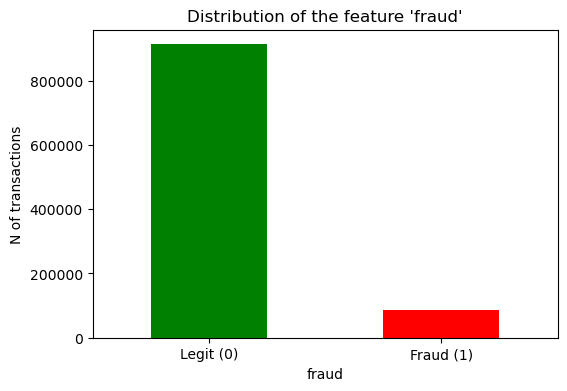

In [16]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
fraud_counts.plot(kind='bar', color=['green', 'red'])
plt.title("Distribution of the feature 'fraud'")
plt.xticks(ticks=[0,1], labels=['Legit (0)', 'Fraud (1)'], rotation=0)
plt.ylabel("N of transactions")
plt.show()

- The target variable fraud has 91.26% legitimate transactions and only 8.74% fraudulent ones.

- This implies that we are dealing with an unbalanced dataset, since the majority class dominates the data set.

- Under these conditions, a model could learn to predict mainly class 0 (legitimate) and obtain high accuracy, but it would not be useful for detecting fraud.

In [20]:
#2.** Train a LogisticRegression.

X = df.drop(columns=["fraud"])
y = df["fraud"]

X_train, X_test, y_train, y_test, = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

print(X_train.shape)
print(X_test.shape)

(700000, 7)
(300000, 7)


In [21]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(solver='liblinear', class_weight=None, random_state=42)

log_reg.fit(X_train, y_train)

LogisticRegression(random_state=42, solver='liblinear')

In [22]:
y_train_pred = log_reg.predict(X_train)
y_test_pred = log_reg.predict(X_test)


In [24]:
from sklearn.metrics import classification_report, confusion_matrix

print("Results for TRAIN: ")
print (classification_report(y_train, y_train_pred))

print("Results for TEST: ")
print (classification_report(y_test, y_test_pred))


Results for TRAIN: 
              precision    recall  f1-score   support

         0.0       0.96      0.99      0.98    638818
         1.0       0.89      0.60      0.71     61182

    accuracy                           0.96    700000
   macro avg       0.93      0.79      0.85    700000
weighted avg       0.96      0.96      0.95    700000

Results for TEST: 
              precision    recall  f1-score   support

         0.0       0.96      0.99      0.98    273779
         1.0       0.90      0.60      0.72     26221

    accuracy                           0.96    300000
   macro avg       0.93      0.80      0.85    300000
weighted avg       0.96      0.96      0.96    300000



- Precision (0.90)
Of the transactions that the model predicts as fraud, 90% are actually fraud.
- Recall (0.60)
The model detects only 60% of actual fraud.
Problematic: 40% of frauds slip through (false negatives).
- F1-score (0.72)
Balance between precision and recall. Could be improved by increasing recall.

In [27]:
#3.** Evaluate your model. Take in consideration class importance, and evaluate it by selection the correct metric.

from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

# ---- Reporte de clasificación ----
print("Evaluation of the Model (Test set):")
print(classification_report(y_test, y_test_pred, target_names=['Legit (0)', 'Fraud (1)']))

Evaluation of the Model (Test set):
              precision    recall  f1-score   support

   Legit (0)       0.96      0.99      0.98    273779
   Fraud (1)       0.90      0.60      0.72     26221

    accuracy                           0.96    300000
   macro avg       0.93      0.80      0.85    300000
weighted avg       0.96      0.96      0.96    300000



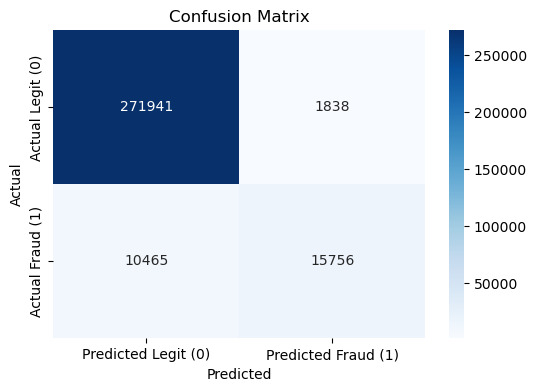

In [26]:
#Confusion Matrix
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_test_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted Legit (0)', 'Predicted Fraud (1)'],
            yticklabels=['Actual Legit (0)', 'Actual Fraud (1)'])
plt.title("Confusion Matrix")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()



In [29]:
# Create model with balanced class weight
log_reg_balanced = LogisticRegression(solver='liblinear', class_weight='balanced', random_state=42)

# Train the model
log_reg_balanced.fit(X_train, y_train)

# Predict on test set
y_test_pred_balanced = log_reg_balanced.predict(X_test)
y_train_pred_balanced = log_reg_balanced.predict(X_train)

# Evaluate
print("TRAIN SET (Balanced Class Weight):")
print(classification_report(y_train, y_train_pred_balanced, target_names=['Legit (0)', 'Fraud (1)']))

print("TEST SET (Balanced Class Weight):")
print(classification_report(y_test, y_test_pred_balanced, target_names=['Legit (0)', 'Fraud (1)']))


TRAIN SET (Balanced Class Weight):
              precision    recall  f1-score   support

   Legit (0)       0.99      0.93      0.96    638818
   Fraud (1)       0.57      0.95      0.72     61182

    accuracy                           0.93    700000
   macro avg       0.78      0.94      0.84    700000
weighted avg       0.96      0.93      0.94    700000

TEST SET (Balanced Class Weight):
              precision    recall  f1-score   support

   Legit (0)       0.99      0.93      0.96    273779
   Fraud (1)       0.58      0.95      0.72     26221

    accuracy                           0.93    300000
   macro avg       0.79      0.94      0.84    300000
weighted avg       0.96      0.93      0.94    300000



- Recall for fraud increased from 0.60 → 0.95, meaning the model now catches almost all frauds.
- Precision for fraud dropped from 0.90 → 0.57, meaning more false alarms (legit transactions flagged).
- No overfitting, as train and test results are consistent.
- The trade-off is acceptable for fraud detection, because missing fraud is much more costly than raising false alarms.


In [30]:
#4.** Run **Oversample** in order to balance our target variable and repeat the steps above, now with balanced data. Does it improve the performance of our model? 

!pip install imbalanced-learn

from imblearn.over_sampling import SMOTE

In [31]:
smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train, y_train)

# Check the new class distribution
print("Original y_train value counts:")
print(y_train.value_counts())
print("\nAfter SMOTE y_train value counts:")
print(y_train_bal.value_counts())

Original y_train value counts:
fraud
0.0    638818
1.0     61182
Name: count, dtype: int64

After SMOTE y_train value counts:
fraud
0.0    638818
1.0    638818
Name: count, dtype: int64


In [32]:
# Create logistic regression (no need for class_weight now)
log_reg_smote = LogisticRegression(solver='liblinear', random_state=42)

# Train model
log_reg_smote.fit(X_train_bal, y_train_bal)

# Predict on train and test
y_train_pred_smote = log_reg_smote.predict(X_train_bal)
y_test_pred_smote = log_reg_smote.predict(X_test)

In [34]:
print("TRAIN SET (SMOTE Oversampled):")
print(classification_report(y_train_bal, y_train_pred_smote, target_names=['Legit (0)', 'Fraud (1)']))

print("TEST SET (SMOTE Oversampled):")
print(classification_report(y_test, y_test_pred_smote, target_names=['Legit (0)', 'Fraud (1)']))


TRAIN SET (SMOTE Oversampled):
              precision    recall  f1-score   support

   Legit (0)       0.95      0.93      0.94    638818
   Fraud (1)       0.93      0.95      0.94    638818

    accuracy                           0.94   1277636
   macro avg       0.94      0.94      0.94   1277636
weighted avg       0.94      0.94      0.94   1277636

TEST SET (SMOTE Oversampled):
              precision    recall  f1-score   support

   Legit (0)       0.99      0.93      0.96    273779
   Fraud (1)       0.58      0.95      0.72     26221

    accuracy                           0.93    300000
   macro avg       0.79      0.94      0.84    300000
weighted avg       0.96      0.93      0.94    300000



- Recall is now very high (0.95) → almost all frauds are detected.
- Precision dropped (0.58) → more false alarms, but acceptable in fraud detection.
- F1-score remains 0.72, same as class_weight='balanced'.
- Oversampling helped training balance, but does not change test evaluation much in this large dataset.

In [36]:
#5.** Now, run **Undersample** in order to balance our target variable and repeat the steps above (1-3), now with balanced data. Does it improve the performance of our model?
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=42)
X_train_under, y_train_under = rus.fit_resample(X_train, y_train)

# Check class distribution after undersampling
print("Original y_train value counts:")
print(y_train.value_counts())
print("\nAfter undersampling y_train value counts:")
print(y_train_under.value_counts())

Original y_train value counts:
fraud
0.0    638818
1.0     61182
Name: count, dtype: int64

After undersampling y_train value counts:
fraud
0.0    61182
1.0    61182
Name: count, dtype: int64


In [37]:
log_reg_under = LogisticRegression(solver='liblinear', random_state=42)

# Train the model
log_reg_under.fit(X_train_under, y_train_under)

# Predict on train and test
y_train_pred_under = log_reg_under.predict(X_train_under)
y_test_pred_under = log_reg_under.predict(X_test)


In [38]:
print("TRAIN SET (Undersampled):")
print(classification_report(y_train_under, y_train_pred_under, target_names=['Legit (0)', 'Fraud (1)']))

print("TEST SET (Undersampled):")
print(classification_report(y_test, y_test_pred_under, target_names=['Legit (0)', 'Fraud (1)']))


TRAIN SET (Undersampled):
              precision    recall  f1-score   support

   Legit (0)       0.95      0.93      0.94     61182
   Fraud (1)       0.93      0.95      0.94     61182

    accuracy                           0.94    122364
   macro avg       0.94      0.94      0.94    122364
weighted avg       0.94      0.94      0.94    122364

TEST SET (Undersampled):
              precision    recall  f1-score   support

   Legit (0)       0.99      0.93      0.96    273779
   Fraud (1)       0.58      0.95      0.72     26221

    accuracy                           0.93    300000
   macro avg       0.79      0.94      0.84    300000
weighted avg       0.96      0.93      0.94    300000



- Undersampling worked well to balance training, but does not improve test metrics over class_weight='balanced'.

In [ ]:
#6.** Finally, run **SMOTE** in order to balance our target variable and repeat the steps above (1-3), now with balanced data. Does it improve the performance of our model? 

- We already applied SMOTE in Exercise 4. While it balanced the training set, the performance on the original test set remained the same as class_weight='balanced', with high recall (0.95) for fraud and moderate precision (0.58).

**Overall Conclusions**

- Default Logistic Regression fails on fraud detection due to class imbalance (recall 0.60).
- Balancing strategies (class_weight, SMOTE, undersample) significantly improve recall for fraud (0.95).
- Trade-off: High recall comes with moderate precision (0.57–0.58) → more false positives, acceptable in fraud detection.
- Accuracy is misleading for imbalanced datasets; focus on recall, F1-score, and confusion matrix.
- Class weighting is simplest and effective for large datasets.
- Oversampling/undersampling mainly affects training balance; test metrics may not improve unless using smaller datasets or more complex models.